In [81]:
import pandas as pd
import env
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sb
import scipy.stats as stats
from pydataset import data
from sklearn.model_selection import train_test_split

## Exercises

Exercise II


   1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
   2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.
   3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.


Exercise 2.1: Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [54]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'
    
sql = """ select bedroomcnt, bathroomcnt, propertylandusetypeid,
calculatedfinishedsquarefeet, fips, lotsizesquarefeet,
yearbuilt, taxvaluedollarcnt, assessmentyear, taxamount 
 from properties_2017 where propertylandusetypeid = 261 """


df = pd.read_sql(sql, url)

KeyboardInterrupt: 

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'
    
sql = """ select bedroomcnt, bathroomcnt, propertylandusetypeid,
calculatedfinishedsquarefeet, fips, lotsizesquarefeet,
yearbuilt, taxvaluedollarcnt, assessmentyear, taxamount 
 from properties_2017 where propertylandusetypeid = 261 """


df = pd.read_sql(sql, url)

In [55]:
df.head()

,bedroomcnt,bathroomcnt,buildingclasstypeid,propertylandusetypeid,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount
0,0.0,0.0,NaN,269.0,NaN,6037.0,85768.0,NaN,9.0,2016.0,NaN
1,0.0,0.0,NaN,261.0,NaN,6037.0,4083.0,NaN,27516.0,2015.0,NaN
2,0.0,0.0,5.0,47.0,73026.0,6037.0,63085.0,1959.0,1434941.0,2016.0,20800.37
3,0.0,0.0,3.0,47.0,5068.0,6037.0,7521.0,1948.0,1174475.0,2016.0,14557.57
4,0.0,0.0,4.0,31.0,1776.0,6037.0,8512.0,1947.0,440101.0,2016.0,5725.17


In [56]:
df.describe()

,bedroomcnt,bathroomcnt,buildingclasstypeid,propertylandusetypeid,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,assessmentyear,taxamount
count,2.982272e+06,2.982260e+06,12731.000000,2.982285e+06,2.940120e+06,2.982285e+06,2.712511e+06,2.937384e+06,2.950951e+06,2.982284e+06,2.962465e+06
mean,3.093362e+00,2.216196e+00,3.734742,2.600508e+02,1.831455e+03,6.048053e+03,2.260376e+04,1.964438e+03,4.435279e+05,2.015998e+03,5.408949e+03
std,1.271569e+00,1.078250e+00,0.500371,1.593121e+01,1.954198e+03,2.024082e+01,2.499836e+05,2.364428e+01,8.163366e+05,6.039949e-02,9.675567e+03
min,0.000000e+00,0.000000e+00,1.000000,3.100000e+01,1.000000e+00,6.037000e+03,1.000000e+02,1.801000e+03,1.000000e+00,2.000000e+03,2.400000e-01
25%,2.000000e+00,2.000000e+00,3.000000,2.610000e+02,1.215000e+03,6.037000e+03,5.683000e+03,1.950000e+03,1.882200e+05,2.016000e+03,2.468620e+03
50%,3.000000e+00,2.000000e+00,4.000000,2.610000e+02,1.574000e+03,6.037000e+03,7.000000e+03,1.963000e+03,3.211610e+05,2.016000e+03,4.007620e+03
75%,4.000000e+00,3.000000e+00,4.000000,2.610000e+02,2.140000e+03,6.059000e+03,9.893000e+03,1.981000e+03,5.140720e+05,2.016000e+03,6.230500e+03
max,2.500000e+01,3.200000e+01,5.000000,2.790000e+02,9.525760e+05,6.111000e+03,3.710005e+08,2.016000e+03,3.196225e+08,2.016000e+03,3.823176e+06


Exercise 2.2: Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [9]:
# Acquire
# This module will hold the functions I need to acquire a database in my jupyter notebook

def connect(db):
    """This function will pull the information from my env file (username, password, host,
    database) to connect to Codeup's MySQL database"""
    import env
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'
    
def get_zillow_data(db):
    """ This function pulls information from the mySQL zillow database and returns it as a
    pandas dataframe"""
    sql = """ select bedroomcnt, bathroomcnt,
calculatedfinishedsquarefeet as sq_ft, fips, lotsizesquarefeet as lot_size,
yearbuilt, taxvaluedollarcnt as tax_value, yearbuilt, assessmentyear, taxamount 
 from properties_2017 where propertylandusetypeid = '261' limit 1000 """
    zillow = pd.read_sql(sql, url)
    return zillow
    
    

Exercise 2.3: Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [57]:
# Renaming columns
zillow = df.rename(columns= {'bedroomcnt': 'beds', 'bathroomcnt':'baths',
                        'taxamount':'tax_amt', 'lotsizesquarefeet':'lot_size',
                        'calculatedfinishedsquarefeet':'sq_ft',
                        'taxvaluedollarcnt':'tax_val','yearbuilt':'year',
                        })

In [58]:
zillow.head()

,beds,baths,buildingclasstypeid,propertylandusetypeid,sq_ft,fips,lot_size,year,tax_val,assessmentyear,tax_amt
0,0.0,0.0,NaN,269.0,NaN,6037.0,85768.0,NaN,9.0,2016.0,NaN
1,0.0,0.0,NaN,261.0,NaN,6037.0,4083.0,NaN,27516.0,2015.0,NaN
2,0.0,0.0,5.0,47.0,73026.0,6037.0,63085.0,1959.0,1434941.0,2016.0,20800.37
3,0.0,0.0,3.0,47.0,5068.0,6037.0,7521.0,1948.0,1174475.0,2016.0,14557.57
4,0.0,0.0,4.0,31.0,1776.0,6037.0,8512.0,1947.0,440101.0,2016.0,5725.17


In [60]:
# I forgot to filter for SFH when I pulled my data, so I'll do that before going any further
zillow['prop_type'] = df.propertylandusetypeid = 261
zillow.head()

,beds,baths,buildingclasstypeid,propertylandusetypeid,sq_ft,fips,lot_size,year,tax_val,assessmentyear,tax_amt,prop_type
0,0.0,0.0,NaN,269.0,NaN,6037.0,85768.0,NaN,9.0,2016.0,NaN,261
1,0.0,0.0,NaN,261.0,NaN,6037.0,4083.0,NaN,27516.0,2015.0,NaN,261
2,0.0,0.0,5.0,47.0,73026.0,6037.0,63085.0,1959.0,1434941.0,2016.0,20800.37,261
3,0.0,0.0,3.0,47.0,5068.0,6037.0,7521.0,1948.0,1174475.0,2016.0,14557.57,261
4,0.0,0.0,4.0,31.0,1776.0,6037.0,8512.0,1947.0,440101.0,2016.0,5725.17,261


In [63]:
zillow = zillow.drop(columns={'buildingclasstypeid', 'propertylandusetypeid'})

In [64]:
zillow.head()

,beds,baths,sq_ft,fips,lot_size,year,tax_val,assessmentyear,tax_amt,prop_type
0,0.0,0.0,NaN,6037.0,85768.0,NaN,9.0,2016.0,NaN,261
1,0.0,0.0,NaN,6037.0,4083.0,NaN,27516.0,2015.0,NaN,261
2,0.0,0.0,73026.0,6037.0,63085.0,1959.0,1434941.0,2016.0,20800.37,261
3,0.0,0.0,5068.0,6037.0,7521.0,1948.0,1174475.0,2016.0,14557.57,261
4,0.0,0.0,1776.0,6037.0,8512.0,1947.0,440101.0,2016.0,5725.17,261


In [65]:
# I need to do something else with these null values. First, I'll look to see how many
# there are per column
zillow.isna().sum()

beds                2945
baths               2957
sq_ft              45097
fips                2932
lot_size          272706
year               47833
tax_val            34266
assessmentyear      2933
tax_amt            22752
prop_type              0
dtype: int64

In [66]:

zillow.shape

(2985217, 10)

In [48]:
zillow.head()

,beds,baths,lot_size,fips,lot_size,year,tax_val,assessmentyear,tax_amt,prop_type
0,0.0,0.0,NaN,6037.0,85768.0,NaN,9.0,2016.0,NaN,261
1,0.0,0.0,NaN,6037.0,4083.0,NaN,27516.0,2015.0,NaN,261
2,0.0,0.0,73026.0,6037.0,63085.0,1959.0,1434941.0,2016.0,20800.37,261
3,0.0,0.0,5068.0,6037.0,7521.0,1948.0,1174475.0,2016.0,14557.57,261
4,0.0,0.0,1776.0,6037.0,8512.0,1947.0,440101.0,2016.0,5725.17,261


In [67]:
# Next I need to know how those numbers compare to my overall df.
# I need to divide all of those numbers by 2985217. As a rule, if it's
# less than 10% , I'm just gonna drop them instead of imputing.

(zillow.isna().sum()/2985217)*100

beds              0.098653
baths             0.099055
sq_ft             1.510677
fips              0.098217
lot_size          9.135215
year              1.602329
tax_val           1.147856
assessmentyear    0.098251
tax_amt           0.762156
prop_type         0.000000
dtype: float64

In [68]:
# All less than 10%, so I'll drop them

zillow= zillow.dropna()

# Check to make sure they're gone
zillow.isna().sum()

beds              0
baths             0
sq_ft             0
fips              0
lot_size          0
year              0
tax_val           0
assessmentyear    0
tax_amt           0
prop_type         0
dtype: int64

### Visualizations & Dealing with Outliers

In [69]:
zillow.dtypes

# Everything is already a float or int, so I don't need to convert any dtypes

beds              float64
baths             float64
sq_ft             float64
fips              float64
lot_size          float64
year              float64
tax_val           float64
assessmentyear    float64
tax_amt           float64
prop_type           int64
dtype: object

beds


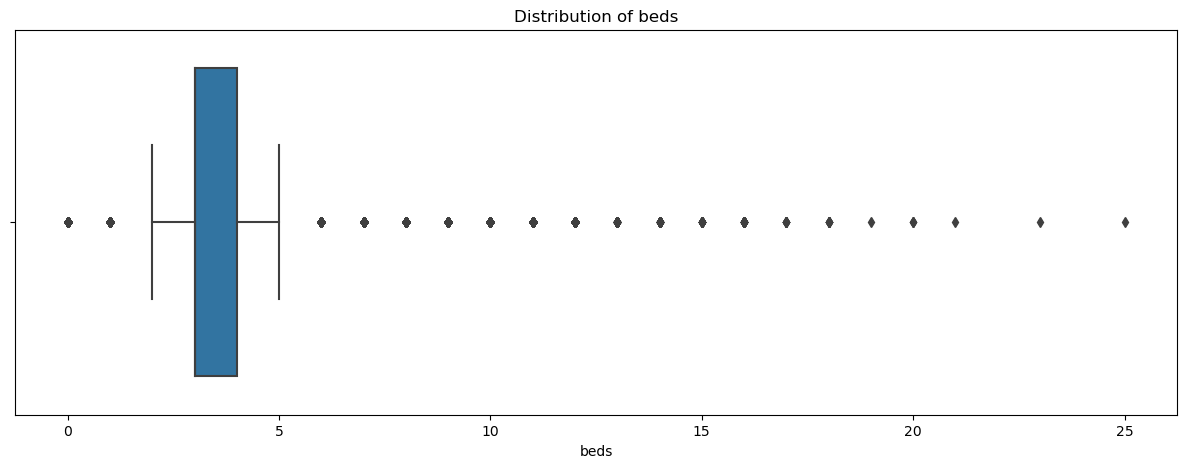

baths


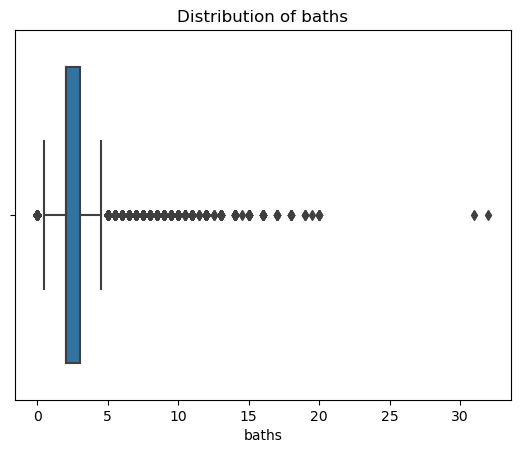

sq_ft


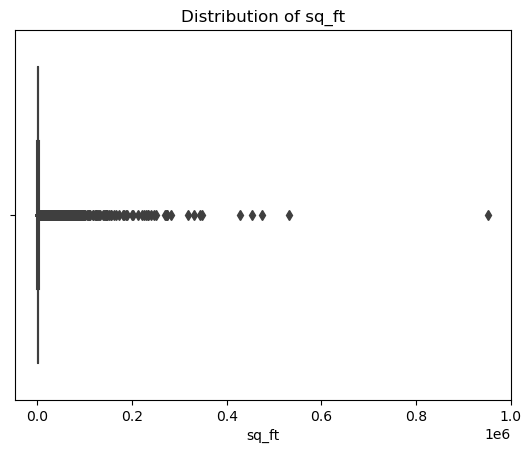

lot_size


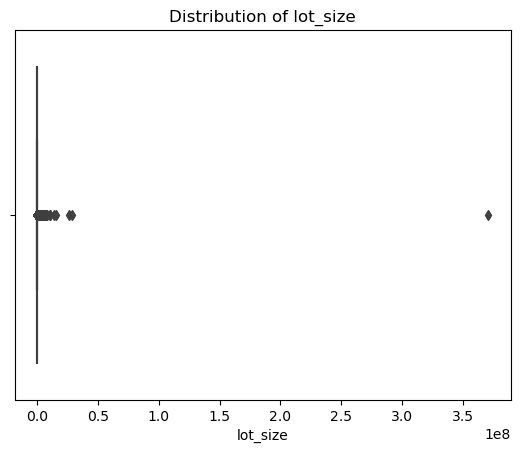

tax_val


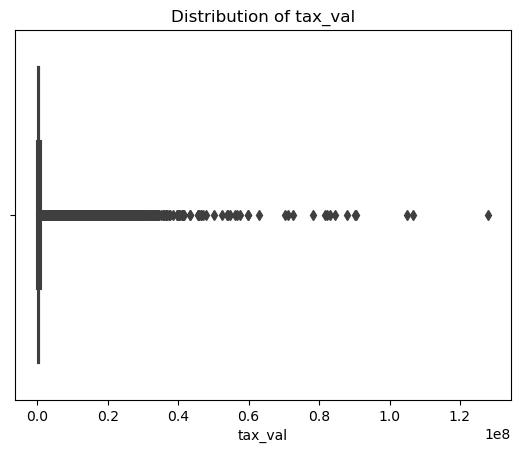

In [86]:
# Before I split this dataset, I need to deal with my outliers

plt.figure(figsize=(15,5))
cols = ['beds','baths', 'sq_ft', 'lot_size', 'tax_val']

for col in cols:
    print(col)
    sb.boxplot(x=col, data=zillow)
    plt.title( f'Distribution of {col}')
    plt.show()

<AxesSubplot:>

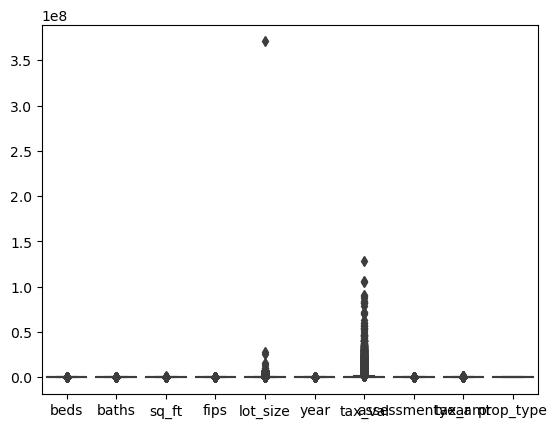

In [85]:
sb.boxplot(data=zillow)

#### Observations:
- I have lots of outliers to handle, as indicated by the black diamonds on my boxplots.

In [88]:
# FROM CLASS REVIEW

zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,2693035.0,3.231911,1.179512,0.00,3.00,3.00,4.00,2.500000e+01
baths,2693035.0,2.279786,1.043095,0.00,2.00,2.00,3.00,3.200000e+01
sq_ft,2693035.0,1864.614570,1675.465081,1.00,1239.00,1606.00,2192.00,9.525760e+05
fips,2693035.0,6046.861796,19.743060,6037.00,6037.00,6037.00,6059.00,6.111000e+03
lot_size,2693035.0,22373.757132,249338.017288,104.00,5688.00,7000.00,9867.00,3.710005e+08
year,2693035.0,1962.316336,22.988360,1801.00,1949.00,1961.00,1979.00,2.016000e+03
tax_val,2693035.0,446172.944429,666536.282004,22.00,190770.00,323283.00,519169.00,1.280603e+08
assessmentyear,2693035.0,2015.999446,0.033019,2014.00,2016.00,2016.00,2016.00,2.016000e+03
tax_amt,2693035.0,5474.861817,7881.957799,6.34,2545.98,4069.35,6295.71,1.765816e+06
prop_type,2693035.0,261.000000,0.000000,261.00,261.00,261.00,261.00,2.610000e+02


In [94]:
col_qs={}
for col in cols:
    col_qs[col] = q1, q3 = zillow[col].quantile([0.25, 0.75])

In [97]:
col_qs['beds'][0.25],col_qs['beds'][0.75]

(3.0, 4.0)

In [106]:
col_qs['baths'][0.25],col_qs['baths'][0.75]

(2.0, 3.0)

In [107]:
col_qs['sq_ft'][0.25],col_qs['sq_ft'][0.75]

(1239.0, 2192.0)

In [108]:
col_qs['tax_val'][0.25],col_qs['tax_val'][0.75]

(190770.0, 519169.0)

In [95]:
#Quartiles
q1, q3 = df[col].quantile([.25, .75])

#Interquartile Range
iq = q3 - q1

#Sets Upper Bound
up_bnd= q3 + k * iq

#Sets lower bound
lo_bnd = q1 - k * iq

df= df[(df[col] > lo_bnd) & (df[col] < up_bnd)]


KeyError: 'tax_val'

In [56]:
split_zillow(zillow)

([     bed  bath   sq_ft    fips  lot_size  yearbuilt  tax_value  \
  434  4.0   2.5  2269.0  6111.0    7200.0     1981.0   361190.0   
  836  4.0   2.0  2192.0  6037.0   35999.0     1951.0   593493.0   
  185  4.0   3.0  2622.0  6111.0    6379.0     1991.0   543458.0   
  65   2.0   1.0  1089.0  6111.0    6661.0     1929.0   195404.0   
  134  4.0   2.0  1293.0  6111.0    5600.0     1955.0   117649.0   
  ..   ...   ...     ...     ...       ...        ...        ...   
  600  5.0   2.5  1958.0  6111.0    6400.0     1964.0   454597.0   
  907  3.0   2.0  1462.0  6037.0    9537.0     1955.0   299493.0   
  360  3.0   2.5  1842.0  6111.0    7900.0     1961.0   241419.0   
  982  4.0   2.0  1856.0  6037.0   11386.0     1962.0   420037.0   
  711  3.0   3.0  2287.0  6111.0   11780.0     1960.0   546538.0   
  
       assessmentyear  taxamount  
  434          2016.0    3942.58  
  836          2016.0    7264.47  
  185          2016.0    4454.86  
  65           2016.0    2882.42  
  134 

In [76]:
train, val, test = split_zillow(zillow)
train, val, test

(     bed  bath   sq_ft    fips  lot_size  yearbuilt  tax_value  \
 444  5.0   4.5  4092.0  6111.0    7475.0     1995.0   693708.0   
 177  3.0   2.0  1244.0  6111.0    7920.0     1959.0   248859.0   
 73   2.0   1.0  1411.0  6111.0   13825.0     1947.0   222532.0   
 141  2.0   1.0  1026.0  6111.0    6798.0     1948.0   222423.0   
 946  4.0   2.0  1750.0  6037.0    7379.0     1954.0   227917.0   
 ..   ...   ...     ...     ...       ...        ...        ...   
 686  4.0   2.0  1462.0  6111.0    7152.0     1972.0   157520.0   
 619  4.0   2.0  1638.0  6111.0    7533.0     1964.0   476000.0   
 978  3.0   2.0  1325.0  6037.0    7641.0     1954.0   107298.0   
 431  4.0   3.0  1781.0  6111.0    6100.0     1968.0   130053.0   
 548  4.0   2.0  2236.0  6111.0    8470.0     1978.0   189979.0   
 
      assessmentyear  taxamount  
 444          2016.0    7670.58  
 177          2016.0    2616.36  
 73           2016.0    3205.88  
 141          2016.0    2363.02  
 946          2016.0    

In [77]:
zillow.describe()

,bed,bath,sq_ft,fips,lot_size,yearbuilt,tax_value,assessmentyear,taxamount
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,9.710000e+02,971.000000,971.000000
mean,3.532441,2.323893,1926.489186,6091.830072,12408.427394,1969.408857,4.272985e+05,2015.992791,4951.625726
std,0.887327,0.866255,928.052799,32.163355,28640.019231,16.717010,4.521611e+05,0.115542,5147.671750
min,0.000000,0.000000,171.000000,6037.000000,1750.000000,1890.000000,5.328000e+03,2014.000000,49.180000
25%,3.000000,2.000000,1379.500000,6059.000000,6255.500000,1959.000000,2.193705e+05,2016.000000,2593.060000
50%,4.000000,2.000000,1750.000000,6111.000000,7441.000000,1968.000000,3.516500e+05,2016.000000,4108.770000
75%,4.000000,3.000000,2234.000000,6111.000000,10000.000000,1980.000000,5.179075e+05,2016.000000,5940.980000
max,8.000000,10.000000,13875.000000,6111.000000,595917.000000,2015.000000,9.094608e+06,2016.000000,102053.650000


### Wrangle.py
Time to put the 'fun' in functions

In [104]:
##################### *ACQUIRE* ##########################
def get_zillow():
    """ This function pulls information from the mySQL zillow database and returns it as a
    pandas dataframe"""
    sql = """ select bedroomcnt, bathroomcnt,
calculatedfinishedsquarefeet as sq_ft, fips, lotsizesquarefeet as lot_size,
yearbuilt, taxvaluedollarcnt as tax_value, yearbuilt, assessmentyear, taxamount 
 from properties_2017 where propertylandusetypeid = '261' limit 1000 """
    df = pd.read_sql(sql, url)
    return df

#################### *PREPARE* ############################

def prep_zillow(df):
    """ This function prepares/cleans data from the zillow df for splitting"""
    
    # Drops null values from columns
    df= df.dropna()
    
    #Renames columns to something more visual appealing
    df = df.rename(columns= {'bedroomcnt': 'beds', 'bathroomcnt':'baths',
                        'taxamount':'tax_amt', 'lotsizesquarefeet':'lot_size',
                        'calculatedfinishedsquarefeet':'sq_ft',
                        'taxvaluedollarcnt':'tax_val','yearbuilt':'year',
                        })
    
    #Drops duplicate values from df
    df = df.drop_duplicates(inplace=True)
    
    return df

################### *OUTLIERS* #########################
# brought to you by Madeleine
def banish_them(df, col_list, k=1.5):
    """This function removes outliers from the columns in the dataframe 
    , then returns the dataframe """
    
    #Quartiles
    q1, q3 = df[col].quantile([.25, .75])
    
    #Interquartile Range
    iq = q3 - q1
    
    #Sets Upper Bound
    up_bnd= q3 + k * iq
    
    #Sets lower bound
    lo_bnd = q1 - k * iq
    
    df= df[(df[col] > lo_bnd) & (df[col] < up_bnd)]
    
    return df
################### *SPLIT* ###################
def split_zillow(df):
    '''
    take in a DataFrame return train, validate, test split on zillow DataFrame.
    '''
# Reminder: I don't need to stratify in regression. I don't remember why, but Madeleine said 
# it
    train_val, test = train_test_split(df, test_size=.2, random_state=123)
    train, val = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, val, test

################## *WRANGLE* ################
def wrangle_zillow():
    
    train, val, test = prep_zillow(get_zillow())
    
    return train, val, test
